## Question 2

- Initial imports

In [2]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.cluster.hierarchy import dendrogram, linkage


- Create data frame

In [5]:
FILENAME = "Question 2 Student DATA.csv"

df = pd.read_csv(FILENAME)

df.head()

,STUDENT ID,Age,Gender,Graduated high-school type,Scholarship type,Additional work,Regular artistic or sports activity,married,salary,Transportation to the university,...,Attendance to the seminars/conferences,Impact of your projects/activities,Attendance to classes,Preparation for midterm exams 1,Preparation for midterm exams 2,Taking notes in classes,Listening in classes,Discussion improves my interest and success,CGPA last sem,expected CGPA
0,STUDENT1,22.0,M,other,3,1,2,no,150.0,1,...,1,1,1,1.0,1,3,2,1,1,1
1,STUDENT2,22.0,M,other,3,1,2,no,150.0,1,...,1,1,1,1.0,1,3,2,3,2,3
2,STUDENT3,22.0,M,state,3,2,2,no,240.0,4,...,1,1,1,1.0,1,2,2,1,2,2
3,STUDENT4,18.0,F,private,3,1,2,yes,245.0,1,...,1,1,1,1.0,2,3,2,2,3,2
4,STUDENT5,23.0,M,private,3,2,2,yes,300.0,1,...,1,1,1,2.0,1,2,2,2,2,2


### **Problem Statement**
**"Cluster students based on their study habits and academic performance to identify distinct groups, and compare the results of k-means and hierarchical clustering."**

#### **Key Features** (Simple, Interpretable, and Numeric/Ordinal):
1. **Weekly study hours** (Attribute 18: 1–5, ordinal).  
2. **Attendance to classes** (Attribute 23: 1–3, ordinal; reverse-coded for clarity, e.g., 1=never → 3=always).  
3. **Taking notes** (Attribute 26: 1–3, ordinal).  
4. **Cumulative GPA** (Attribute 29: 1–5, ordinal).  



In [ ]:
selected_columns = [
    "Weekly study hours",
    "Attendance to classes",
    "Taking notes in classes",
    "CGPA last sem"
]

df = df[selected_columns]
df.head()

,Weekly study hours,Attendance to classes,Taking notes in classes,CGPA last sem
0,3,1,3,1
1,2,1,3,2
2,2,1,2,2
3,3,1,3,3
4,2,1,2,2


- Normalize data

In [12]:
df["Attendance to classes"] = df["Attendance to classes"].apply(lambda x: 4 - x)

scaler = MinMaxScaler()
df_normalized = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)
df.head()

,Weekly study hours,Attendance to classes,Taking notes in classes,CGPA last sem
0,3,1,3,1
1,2,1,3,2
2,2,1,2,2
3,3,1,3,3
4,2,1,2,2


- Elbow Method to find K

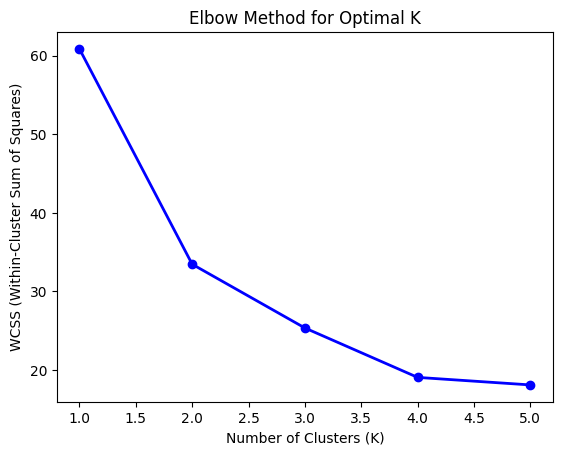

In [17]:
wcss = []
K = range(1, 6)

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_normalized)
    wcss.append(kmeans.inertia_)

plt.plot(K, wcss, 'bo-', linewidth=2)
plt.title("Elbow Method for Optimal K")
plt.xlabel("Number of Clusters (K)")
plt.ylabel("WCSS (Within-Cluster Sum of Squares)")
plt.show()

Silhouette Score for K-Means: 0.37661161441545526


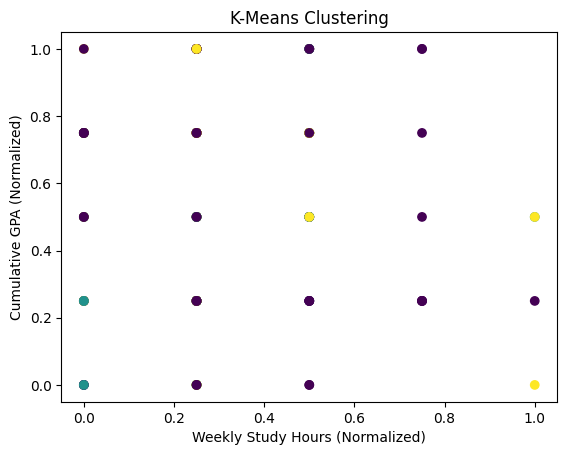

In [21]:
optimal_k = 3
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
kmeans_labels = kmeans.fit_predict(df_normalized)

df["KMeans Cluster"] = kmeans_labels

silhouette_avg = silhouette_score(df_normalized, kmeans_labels)
print(f"Silhouette Score for K-Means: {silhouette_avg}")

# Visualize clusters (using first two features)
plt.scatter(df_normalized["Weekly study hours"], df_normalized["CGPA last sem"], c=kmeans_labels)
plt.title("K-Means Clustering")
plt.xlabel("Weekly Study Hours (Normalized)")
plt.ylabel("Cumulative GPA (Normalized)")
plt.show()

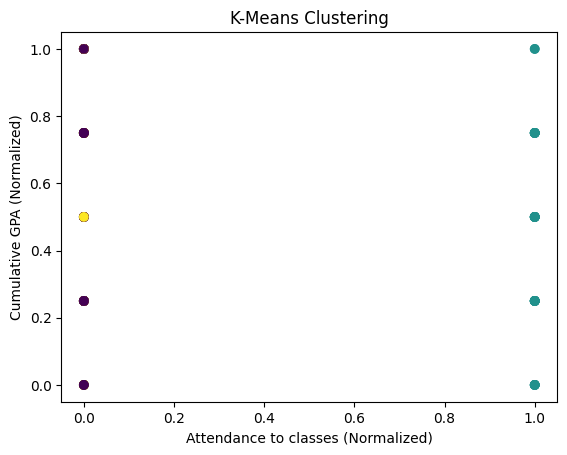

In [22]:
plt.scatter(df_normalized["Attendance to classes"], df_normalized["CGPA last sem"], c=kmeans_labels)
plt.title("K-Means Clustering")
plt.xlabel("Attendance to classes (Normalized)")
plt.ylabel("Cumulative GPA (Normalized)")
plt.show()

Silhouette Score for Hierarchical (single): 0.45651492815688016


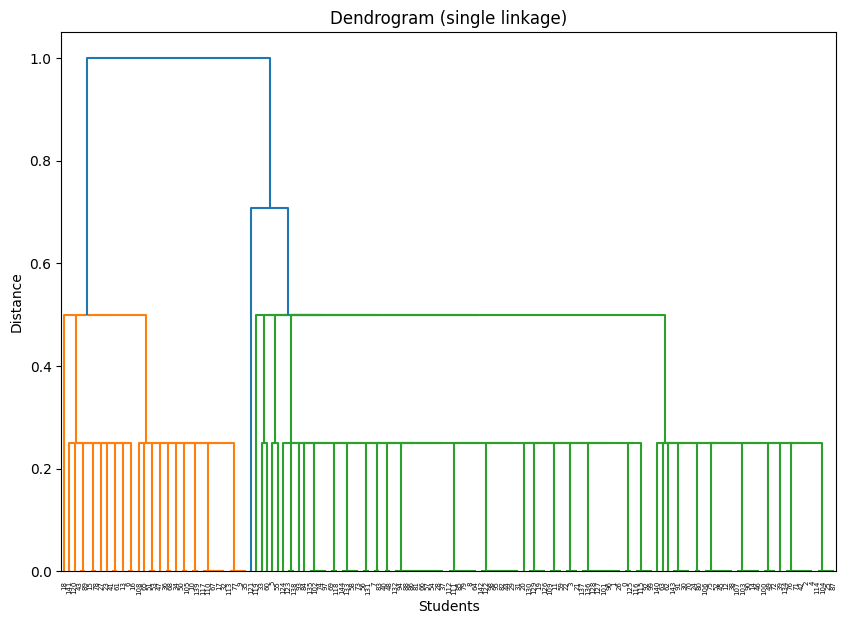

Silhouette Score for Hierarchical (complete): 0.3083587619886912


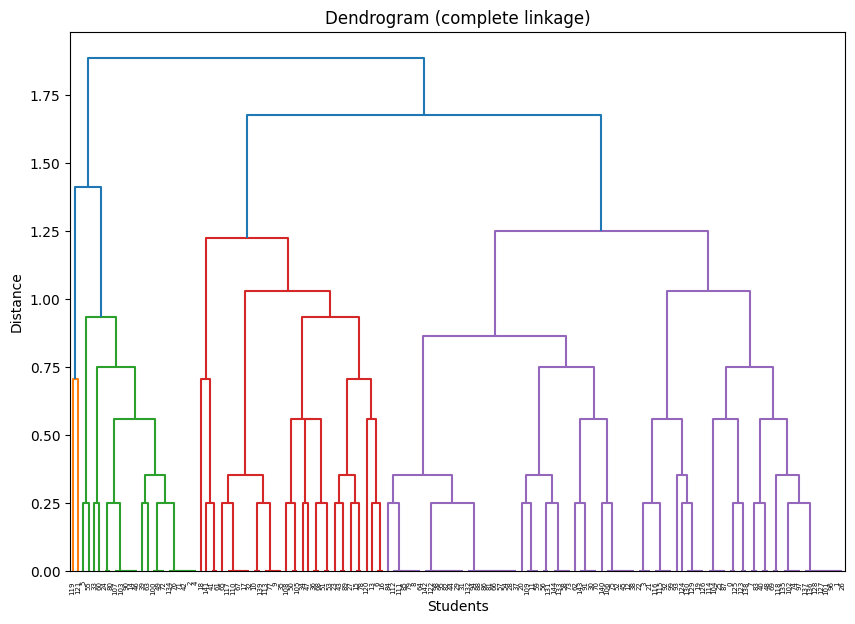

Silhouette Score for Hierarchical (average): 0.42494128384615365


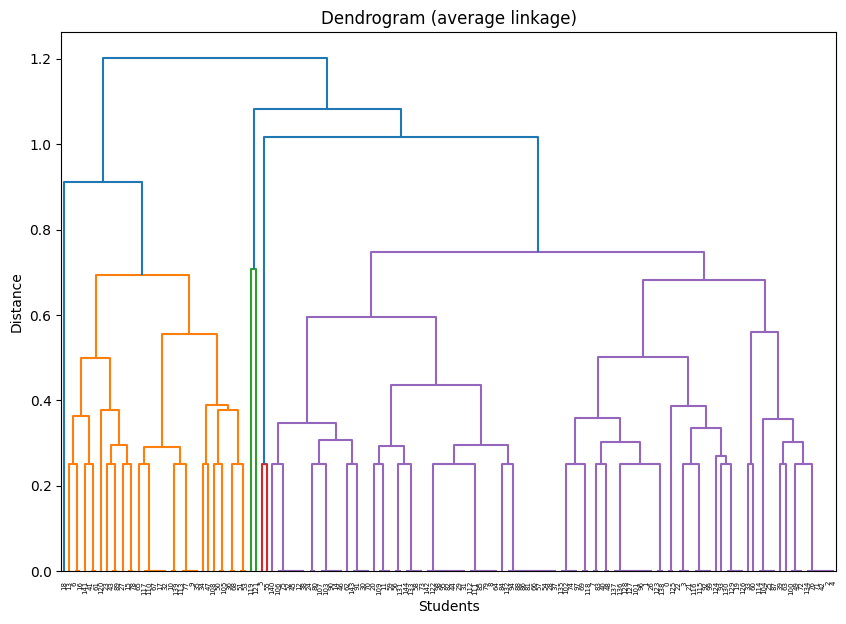

In [23]:
# Perform Agglomerative Clustering (single, complete, and average linkage)
linkage_methods = ["single", "complete", "average"]

for method in linkage_methods:
    # Fit Agglomerative Clustering
    hierarchical = AgglomerativeClustering(n_clusters=optimal_k, linkage=method)
    hierarchical_labels = hierarchical.fit_predict(df_normalized)

    # Add cluster labels to the original dataset
    df[f"Hierarchical ({method}) Cluster"] = hierarchical_labels

    # Evaluate clustering
    silhouette_avg = silhouette_score(df_normalized, hierarchical_labels)
    print(f"Silhouette Score for Hierarchical ({method}): {silhouette_avg}")

    # Plot dendrogram
    plt.figure(figsize=(10, 7))
    dendrogram(linkage(df_normalized, method=method))
    plt.title(f"Dendrogram ({method} linkage)")
    plt.xlabel("Students")
    plt.ylabel("Distance")
    plt.show()


In [24]:
# Compare the clusters produced by K-Means and Hierarchical Clustering
print("Cluster Labels (K-Means vs. Hierarchical):")
print(df[["KMeans Cluster", "Hierarchical (single) Cluster", "Hierarchical (complete) Cluster", "Hierarchical (average) Cluster"]])

# Analyze the quality of clusters and performance (Silhouette scores were reported above)


Cluster Labels (K-Means vs. Hierarchical):
     KMeans Cluster  Hierarchical (single) Cluster  \
0                 0                              2   
1                 0                              2   
2                 2                              2   
3                 0                              2   
4                 2                              2   
..              ...                            ...   
140               2                              2   
141               1                              0   
142               0                              2   
143               2                              2   
144               0                              2   

     Hierarchical (complete) Cluster  Hierarchical (average) Cluster  
0                                  1                               0  
1                                  1                               0  
2                                  0                               0  
3                       